<a href="https://colab.research.google.com/github/BabakAlaodolehei/Machine-Learnig-Python--ANN--Housing-price-factors-/blob/main/House_price_factors_2_NN_ML_2_Hlayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas

In [2]:
# input the data set from the excel file

In [7]:
from pandas.io import excel
b_data= pandas.read_excel("/content/drive/MyDrive/as 2 NN ML/House Prices (1).xls")


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
b_data

,SalePrice,GarageCars,GarageArea,OverallQual,GrLivArea
0,208500,2,548,7,1710
1,181500,2,460,6,1262
2,223500,1,608,7,1786
3,140000,1,642,7,1717
4,250000,2,836,8,2198
...,...,...,...,...,...
1455,175000,1,460,6,1647
1456,210000,2,500,6,2073
1457,266500,1,252,7,2340
1458,142125,0,240,5,1078


In [9]:
y= b_data["SalePrice"]

In [10]:
x= b_data [["GarageCars", "GarageArea", "OverallQual", "GrLivArea"]]

In [11]:
# split the data to train and test (80% of data train and 20% test)

In [12]:
import sklearn.model_selection

In [13]:
x_train, x_test, y_train, y_test= sklearn.model_selection.train_test_split(x,y, train_size= 0.8)

In [14]:
# Building the NN model

In [15]:
from keras.models import Sequential
from keras. layers import Dense, Activation

In [16]:
b_model= Sequential()

In [17]:
b_model.add( Dense(64 ,activation="relu", input_dim =4 ))

In [18]:
b_model.add( Dense(128, activation="relu"))

In [19]:
b_model.add( Dense(1, activation="relu"))

In [20]:
b_model.compile(optimizer="adam",loss="mean_squared_error", metrics=['accuracy'])

In [21]:
history=b_model.fit(x_train, y_train, batch_size=60, epochs= 2000)

Epoch 1/2000
20/20 [==============================] - 1s 3ms/step - loss: 38693330944.0000 - accuracy: 0.0000e+00
Epoch 2/2000
20/20 [==============================] - 0s 2ms/step - loss: 38239948800.0000 - accuracy: 0.0000e+00
Epoch 3/2000
20/20 [==============================] - 0s 2ms/step - loss: 37424431104.0000 - accuracy: 0.0000e+00
Epoch 4/2000
20/20 [==============================] - 0s 2ms/step - loss: 35881689088.0000 - accuracy: 0.0000e+00
Epoch 5/2000
20/20 [==============================] - 0s 2ms/step - loss: 33202814976.0000 - accuracy: 0.0000e+00
Epoch 6/2000
20/20 [==============================] - 0s 2ms/step - loss: 29121284096.0000 - accuracy: 0.0000e+00
Epoch 7/2000
20/20 [==============================] - 0s 2ms/step - loss: 23662393344.0000 - accuracy: 0.0000e+00
Epoch 8/2000
20/20 [==============================] - 0s 2ms/step - loss: 17093697536.0000 - accuracy: 0.0000e+00
Epoch 9/2000
20/20 [==============================] - 0s 3ms/step - loss: 10781029376.00

In [22]:
# Plot the trend of Loss in the  trained model

In [23]:
import matplotlib.pyplot as plt

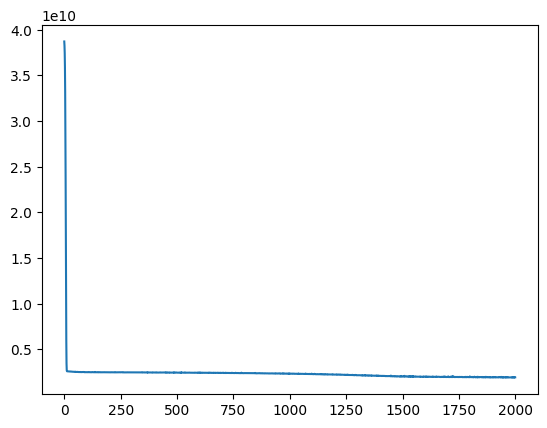

In [24]:
plt.plot (history.history ["loss"])

In [25]:
# prediction of the specific values given by the assignment instruction

In [26]:
b_model.predict([[2,600,7,2200]])

1/1 [==============================] - 0s 123ms/step


array([[245791.64]], dtype=float32)

In [27]:
x_test

,GarageCars,GarageArea,OverallQual,GrLivArea
34,2,556,9,1561
84,1,400,7,1474
869,2,574,7,1949
370,1,460,6,1664
1186,1,420,3,1699
...,...,...,...,...
1164,3,588,5,1432
314,1,546,7,1641
461,2,576,7,1135
591,1,842,10,2296


In [28]:
y_test

34      277500
84      168500
869     236000
370     172400
1186     95000
         ...  
1164    194000
314     178000
461     155000
591     451950
152     190000
Name: SalePrice, Length: 292, dtype: int64

In [29]:
y_pred = b_model.predict (x_test)

10/10 [==============================] - 0s 2ms/step


In [30]:
# conversion and reshape of data to the same type (array) and to the same structur (row to culumn) for calculation of ape( Absolut Precentage Error)

In [31]:
import numpy

In [32]:
y_test_1=y_test.to_numpy()

In [33]:
y_pred_1=y_pred.reshape(1,292)

In [34]:
ape= abs(numpy.subtract(y_pred_1, y_test_1))/y_test_1*100

In [35]:
numpy.mean(ape)

18.2130003585027

In [36]:
b_data["GarageCars"].mean()

1.4835616438356165

In [37]:
b_data["GarageArea"].mean()

472.9801369863014

In [38]:
b_data["OverallQual"].mean()

6.0993150684931505

In [39]:
b_data["GrLivArea"].mean()

1515.463698630137

In [40]:
# simulation for "GrlivArea" and visualization of impact to the saleprice

In [41]:
b_model.predict([[1.48,472.98, 6.09, 2000]])


1/1 [==============================] - 0s 195ms/step


array([[211680.36]], dtype=float32)

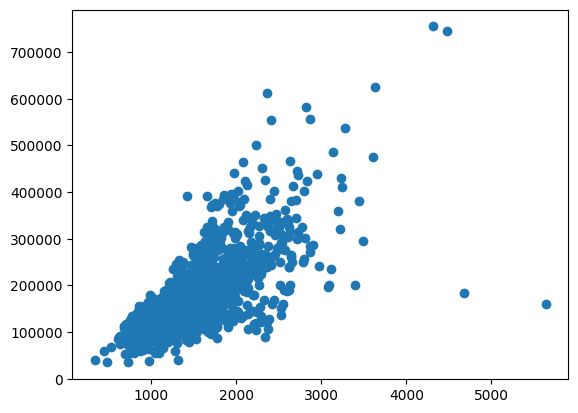

In [42]:
plt.scatter (b_data['GrLivArea'],b_data['SalePrice'])

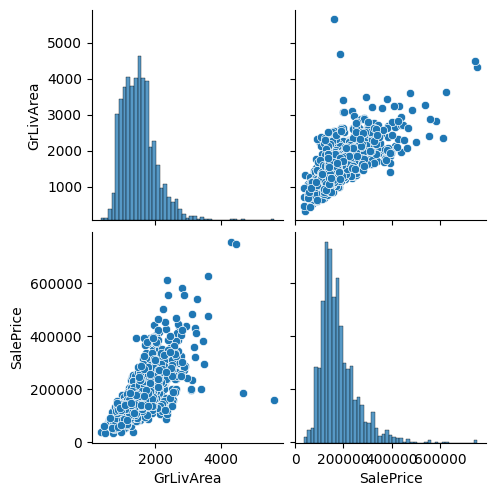

In [43]:
import seaborn as sns
sns.pairplot(b_data[['GrLivArea', 'SalePrice']])

In [44]:
# simulation for "OverallQual" and visualization of impact to the saleprice

In [45]:
b_model.predict([[1.48,472.98, 8, 1515.46]])

1/1 [==============================] - 0s 34ms/step


array([[222752.58]], dtype=float32)

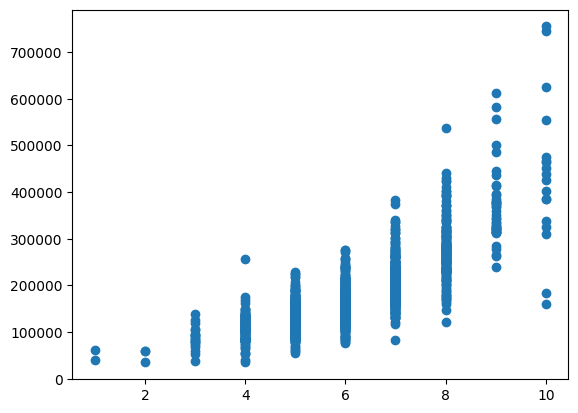

In [46]:
plt.scatter (b_data['OverallQual'],b_data['SalePrice'])

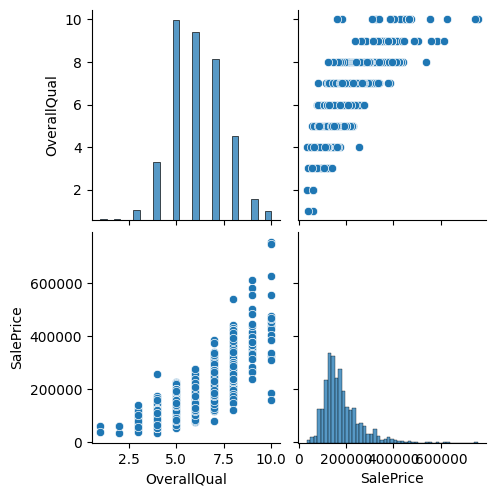

In [47]:
sns.pairplot(b_data[['OverallQual', 'SalePrice']])

In [48]:
# simulation for "GarageArea" and visualization of impact to the saleprice

In [49]:
b_model.predict([[1.48,480, 6.09, 1515.46]])

1/1 [==============================] - 0s 37ms/step


array([[191400.88]], dtype=float32)

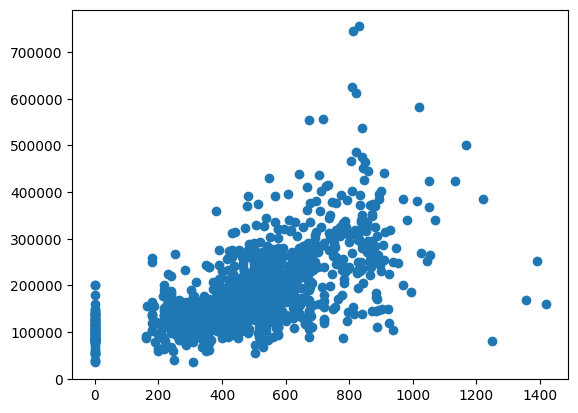

In [50]:
plt.scatter (b_data['GarageArea'],b_data['SalePrice'])

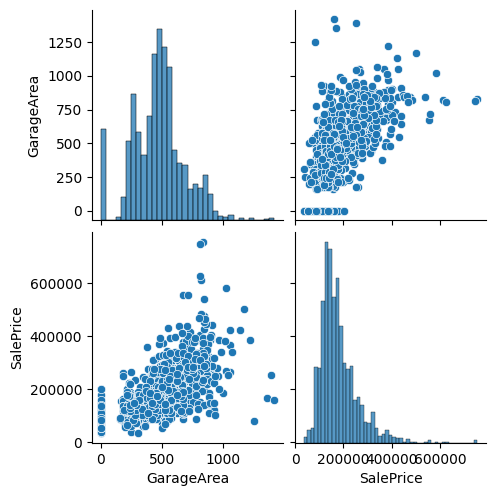

In [51]:
sns.pairplot(b_data[['GarageArea', 'SalePrice']])

In [52]:
# simulation for "GarageCars" and visualization of impact to the saleprice

In [53]:
b_model.predict([[4,472.98, 6.09, 1515.46]])

1/1 [==============================] - 0s 51ms/step


array([[170393.47]], dtype=float32)

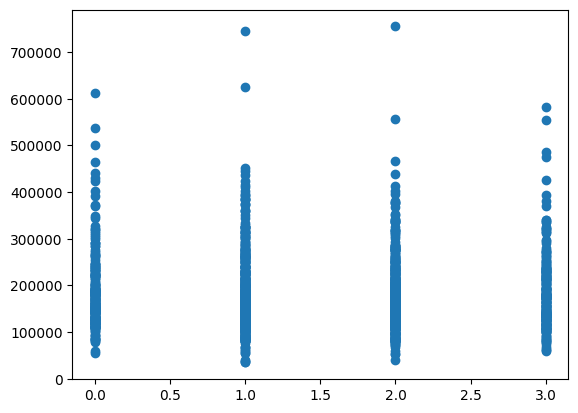

In [54]:
plt.scatter (b_data['GarageCars'],b_data['SalePrice'])

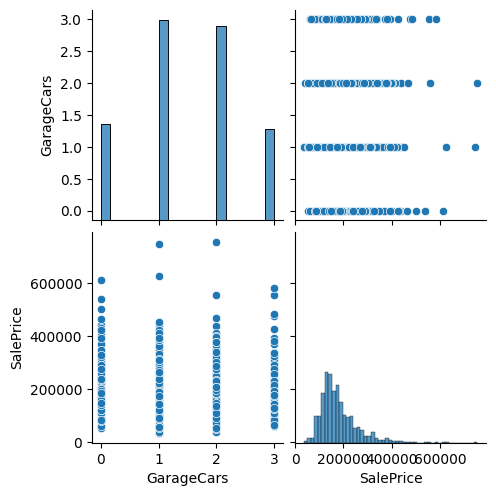

In [92]:
sns.pairplot(b_data[['GarageCars', 'SalePrice']])